In [129]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla
import matplotlib.pyplot as pt
import numpy.polynomial.chebyshev as cheby
% matplotlib inline

I will try to get a solution to the equation:

$ \ddot{u}(x) = 1; \\
\text with \space Boundary \space Conditions: \space u(-1) = 0, \space u(1) = 0 $

Its true solution is given by:
$u(x) = \frac{1}{2}x^2 - \frac{1}{2}$

Using Chebyshev Spectral Differentiation matrices.

In [138]:
n= 20

In [139]:
def GCLmesh(n):
    mesh = np.zeros(n+1)
    for j in range(0,n+1):
        xj = np.cos(j*np.pi/n)
        mesh[j] = xj
    return mesh

In [140]:
def chebyDiffMatrix(n, mesh):
	d_mat = np.zeros((n+1,n+1))
	for i in range(0,n+1):
		for j in range(0,n+1):
			if(i==0 and j==0):
				entry = (2*(n**2) + 1)/6.0
			elif(i==n and j==n):
				entry = - (2*(n**2) + 1)/6.0
			elif (i==j):
				entry = -mesh[j]/(2.0*( 1-(mesh[j]**2) ) )
			else:
				ci = 2.0 if (i==0 or i==n) else 1.0
				cj = 2.0 if (j==0 or j==n) else 1.0
				entry = (ci/cj) * ( ((-1)**(i+j)) / (mesh[i] - mesh[j]) )
			d_mat[i,j] = entry
	return d_mat

In [141]:
mesh = GCLmesh(n)
print(mesh)

[  1.00000000e+00   9.87688341e-01   9.51056516e-01   8.91006524e-01
   8.09016994e-01   7.07106781e-01   5.87785252e-01   4.53990500e-01
   3.09016994e-01   1.56434465e-01   6.12323400e-17  -1.56434465e-01
  -3.09016994e-01  -4.53990500e-01  -5.87785252e-01  -7.07106781e-01
  -8.09016994e-01  -8.91006524e-01  -9.51056516e-01  -9.87688341e-01
  -1.00000000e+00]


In [142]:
D = chebyDiffMatrix(n, mesh)
print(D.round(2))

[[  1.33500000e+02  -1.62450000e+02   4.08600000e+01  -1.83500000e+01
    1.04700000e+01  -6.83000000e+00   4.85000000e+00  -3.66000000e+00
    2.89000000e+00  -2.37000000e+00   2.00000000e+00  -1.73000000e+00
    1.53000000e+00  -1.38000000e+00   1.26000000e+00  -1.17000000e+00
    1.11000000e+00  -1.06000000e+00   1.03000000e+00  -1.01000000e+00
    5.00000000e-01]
 [  4.06100000e+01  -2.01800000e+01  -2.73000000e+01   1.03400000e+01
   -5.60000000e+00   3.56000000e+00  -2.50000000e+00   1.87000000e+00
   -1.47000000e+00   1.20000000e+00  -1.01000000e+00   8.70000000e-01
   -7.70000000e-01   6.90000000e-01  -6.30000000e-01   5.90000000e-01
   -5.60000000e-01   5.30000000e-01  -5.20000000e-01   5.10000000e-01
   -2.50000000e-01]
 [ -1.02200000e+01   2.73000000e+01  -4.98000000e+00  -1.66500000e+01
    7.04000000e+00  -4.10000000e+00   2.75000000e+00  -2.01000000e+00
    1.56000000e+00  -1.26000000e+00   1.05000000e+00  -9.00000000e-01
    7.90000000e-01  -7.10000000e-01   6.50000000e-

In [143]:
K = D.dot(D)
if n < 10: print(K.round(2))

In [145]:
# 1 Modification of matrix for imposing BCs
K[0,:] = 0
K[-1,:] = 0
K[0,0] = 1
K[-1,-1] = 1
#print(K)
rhs = np.ones(n+1)
rhs[0] = 0
rhs[-1] = 0

In [131]:
P,L,U = spla.lu(K)
print('P:')
print(P)
print('L:')
print(L)
print('U:')
print(U)

P:
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
L:
[[ 1.   0.   0.   0. ]
 [ 0.3  1.   0.   0. ]
 [-0.2  1.   1.   0. ]
 [ 0.   0.  -0.   1. ]]
U:
[[ 3.33333333 -5.33333333  2.66666667 -0.66666667]
 [ 0.          1.6        -0.8         0.2       ]
 [ 0.          0.         -4.          3.        ]
 [ 0.          0.          0.          1.        ]]


In [154]:
# 2 Modification (Solving a sub system.)
K = K[1:-1, 1:-1]
if n < 10: print(K)

In [155]:
# Sub vector of right hand sides.
rhs = np.ones(n-1)

In [146]:
num_sol = np.zeros(n+1)
num_sol[0] = 0 # Set first element of the vector to the BC1
num_sol[1:-1] = la.solve(K, rhs) # the rest pf the elements come from solving the sub-system.
num_sol[-1] = 0 # Set last element of the vector to the BC2

ValueError: could not broadcast input array from shape (21) into shape (19)

In [157]:
def true_sol(x):
    return(.5*(x**2) - .5)

xs = np.linspace(-1,1,100)

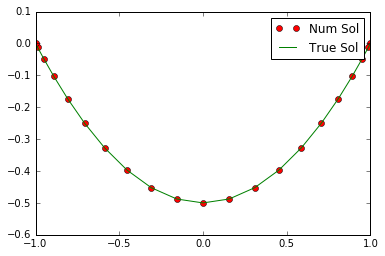

In [158]:
pt.plot(mesh, num_sol, 'ro', label = 'Num Sol')
pt.plot(mesh, true_sol(mesh), 'g-', label = 'True Sol')
pt.legend()

Now that we have a method for computing a second order BVP with Spectral Diff matrices,
we want to solve a more general problem using fixed point iteration over this method.

The problem is as follows:

$ \ddot{u}(x) = e^{u(x)}; \\
\text with \space Boundary \space Conditions: \space u(-1) = 0, \space u(1) = 0 $

In [147]:
n = 21

In [148]:
def f(x):
    return np.exp(x)

In [149]:
mesh = GCLmesh(n)
D = chebyDiffMatrix(n, mesh)
K = D.dot(D)
if n < 10: print(K)

In [150]:
# Select interior points matrix
K = K[1:-1, 1:-1]
if n < 10: print(K)

In [151]:
u = np.zeros(n+1)
if n < 10: print(u)
uk = u[1:-1]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]


In [152]:
while(True):
    rhs = f(uk)

    new_u = la.solve(K,rhs)
    #print ('new_u:')
    #print(new_u)
    #print ('difference with previous:')
    #print((new_u - uk))
    if(la.norm(new_u - uk) <= 1e-10):
        u[1:-1] = new_u
        break
        #print('Found a solution')
        #print(u)
    else:
        uk = new_u

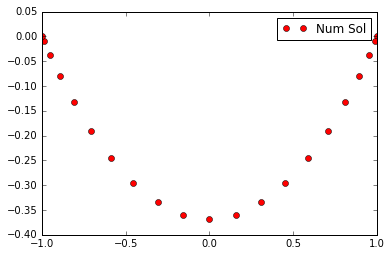

In [153]:
pt.plot(mesh, u, 'ro', label = 'Num Sol')
pt.legend()

In [154]:
print(u)

[ 0.         -0.00958611 -0.03722595 -0.07975387 -0.13246647 -0.18980412
 -0.24604143 -0.29587053 -0.33482862 -0.35957586 -0.36805602 -0.35957586
 -0.33482862 -0.29587053 -0.24604143 -0.18980412 -0.13246647 -0.07975387
 -0.03722595 -0.00958611  0.        ]


In [60]:
u1 = u.copy()

ValueError: x and y must have same first dimension

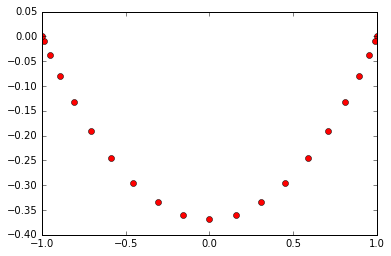

In [156]:
pt.plot(mesh, u, 'ro', label = 'Num Sol')
pt.plot(mesh, cpp_us, 'ro', label = 'Num Sol')

pt.legend()

In [186]:
n = 19

In [187]:
def f(x):
    return np.exp(x)

In [188]:
mesh = GCLmesh(n)
D = chebyDiffMatrix(n, mesh)
K = D.dot(D)
if n < 10: print(K)

In [189]:
K[0,:] = 0
K[-1,:] = 0
K[0,0] = 1
K[-1,-1] = 1

In [196]:
#P,L,U = spla.lu(K)
#print('P:')
#print(P)
#print('L:')
#print(L)
#print('U:')
#print(U)

In [190]:
u = np.zeros(n+1)
if n < 10: print(u)
uk = u.copy()

In [192]:
while(True):
    rhs = f(uk)
    rhs[0] = 0
    rhs[-1] = 0

    new_u = la.solve(K,rhs)

    if(la.norm(new_u - uk) <= 1e-8):
        u = new_u
        print('Found a solution')
        print(u)
        break
    else:
        uk = new_u

Found a solution
[  2.18551082e-15  -1.06103820e-02  -4.10726391e-02  -8.75360133e-02
  -1.44347013e-01  -2.04938193e-01  -2.62700689e-01  -3.11691919e-01
  -3.47129738e-01  -3.65695334e-01  -3.65695334e-01  -3.47129738e-01
  -3.11691919e-01  -2.62700689e-01  -2.04938193e-01  -1.44347013e-01
  -8.75360133e-02  -4.10726391e-02  -1.06103820e-02   0.00000000e+00]


In [193]:
cpp_xs = np.loadtxt('grid.dat')
cpp_us = np.loadtxt('solution.dat')
cpp_us.size
mesh.size

20

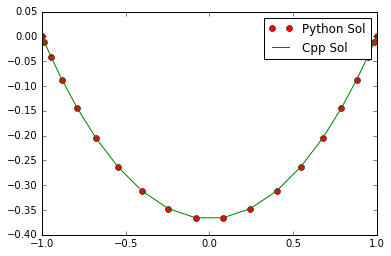

In [195]:
pt.plot(mesh, u, 'ro', label = 'Python Sol')
pt.plot(mesh, cpp_us, 'g-', label = 'Cpp Sol')

pt.legend()

In [100]:
la.norm(u-u1)

7.7698071300203574e-16